In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Prep

-0.03779466168006855 0.9920801322508517


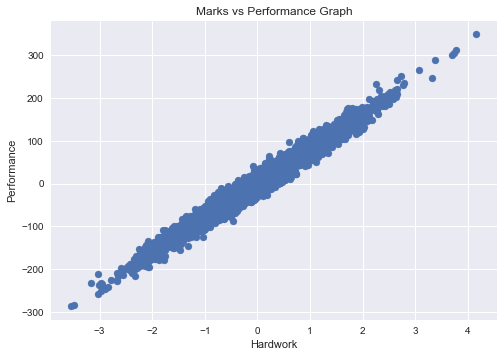

In [26]:
X = pd.read_csv("Linear_X_Train.csv").values
y = pd.read_csv("Linear_Y_Train.csv").values

#normalization
u = X.mean()
std = X.std() 
print(u,std)

X = (X-u)/std


#visualization
plt.style.use("seaborn")
plt.scatter(X,y)
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.title("Marks vs Performance Graph")
plt.show()

# Linear Reg

In [45]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
    return total_error/m

def gradientDescent(X,Y,max_steps=100, lr=0.1):
    theta = np.zeros((2,))
    error_list = []
    
    for i in range(max_steps):
        #compute gradient
        grad = gradient(X,Y,theta)
        e = error(X,y,theta)
        error_list.append(e)
        #update the theta 
        theta[0] = theta[0] - lr*grad[0]
        theta[1] = theta[1] - lr*grad[1]
    return theta,error_list

In [46]:
theta,error_list = gradientDescent(X,y) 

In [47]:
theta
error_list

[array([6576.35005246]),
 array([5363.12510257]),
 array([4380.41289317]),
 array([3584.41600355]),
 array([2939.65852295]),
 array([2417.40496367]),
 array([1994.37958066]),
 array([1651.72902041]),
 array([1374.18206661]),
 array([1149.36903404]),
 array([967.27047765]),
 array([819.77064698]),
 array([700.29578413]),
 array([603.52114523]),
 array([525.13368772]),
 array([461.63984713]),
 array([410.20983626]),
 array([368.55152745]),
 array([334.80829731]),
 array([307.47628091]),
 array([285.33734761]),
 array([267.40481165]),
 array([252.87945752]),
 array([241.11392067]),
 array([231.58383582]),
 array([223.8644671]),
 array([217.61177843]),
 array([212.54710061]),
 array([208.44471157]),
 array([205.12177646]),
 array([202.43019901]),
 array([200.25002128]),
 array([198.48407732]),
 array([197.05366271]),
 array([195.89502687]),
 array([194.95653185]),
 array([194.19635088]),
 array([193.58060429]),
 array([193.08184956]),
 array([192.67785822]),
 array([192.35062524]),
 array(

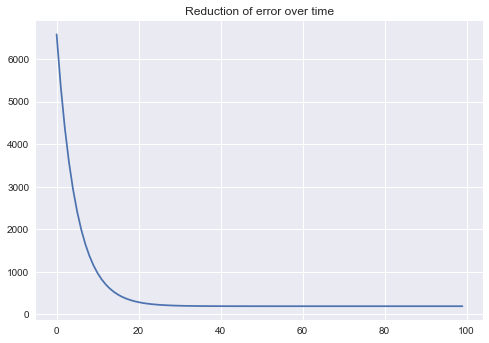

In [49]:
plt.plot(error_list)
plt.title("Reduction of error over time")
plt.show()

# Make prediction

In [52]:
y_ = hypothesis(X,theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


Text(0, 0.5, 'F(x)')

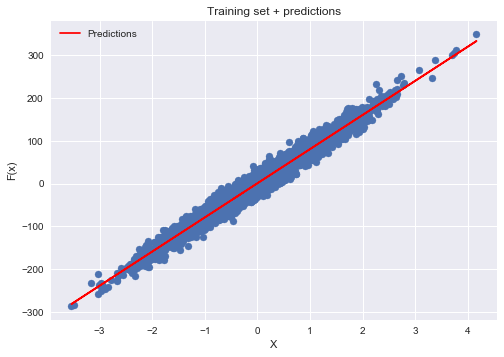

In [54]:
plt.scatter(X,y)
plt.plot(X,y_,color = 'red', label = 'Predictions')
plt.legend()
plt.title("Training set + predictions")
plt.xlabel("X")
plt.ylabel("F(x)")

In [59]:
X_test = pd.read_csv("Linear_X_test.csv").values

In [60]:
#make predictions
y_test = hypothesis(X_test,theta)

In [61]:
print(y_test)

[[-149.37069577]
 [ -68.75494042]
 [-201.48687035]
 ...
 [  10.9121384 ]
 [ -21.53235759]
 [ -53.68460035]]


In [64]:
df = pd.DataFrame(data = y_test, columns =["y"])  
df.to_csv('Predictions.csv', index = False)

In [67]:
#check r2 score
def r2Score(Y,Y_):
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y - Y.mean())**2)
    
    score = (1 - num/denom)
    return score*100

In [68]:
r2Score(y,y_)

97.09612226971643